##### This script covers the main steps in the data exploration process using Python. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = pd.read_csv('adultdata.csv')

In [3]:
data.head(5)

,Age,Workclass,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
1,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
2,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
3,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
4,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K


In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows/columns with missing values
data.dropna(inplace=True)  # Remove rows with missing values

# Remove duplicates
data.drop_duplicates(inplace=True)


Age               0
Workclass         0
fnlwgt            0
Education         0
Education_num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48813 non-null  int64 
 1   Workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   Education       48813 non-null  object
 4   Education_num   48813 non-null  int64 
 5   Marital_Status  48813 non-null  object
 6   Occupation      48813 non-null  object
 7   Relationship    48813 non-null  object
 8   Race            48813 non-null  object
 9   Sex             48813 non-null  object
 10  Capital_gain    48813 non-null  int64 
 11  Capital_loss    48813 non-null  int64 
 12  Hours_per_week  48813 non-null  int64 
 13  Native_country  48813 non-null  object
 14  Income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [6]:
# Display basic statistics
print(data.describe())

# Display data types
print(data.dtypes)


                Age        fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  48813.000000  4.881300e+04   48813.000000  48813.000000  48813.000000   
mean      38.647348  1.896679e+05      10.078688   1079.708705     87.554299   
std       13.709005  1.056062e+05       2.570257   7454.185982    403.118605   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781400e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    48813.000000  
mean        40.425051  
std         12.390954  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
Age                int64
Workclass         object
fnlwgt       

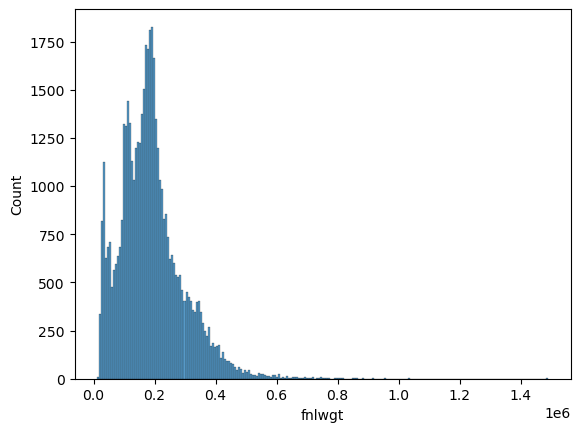

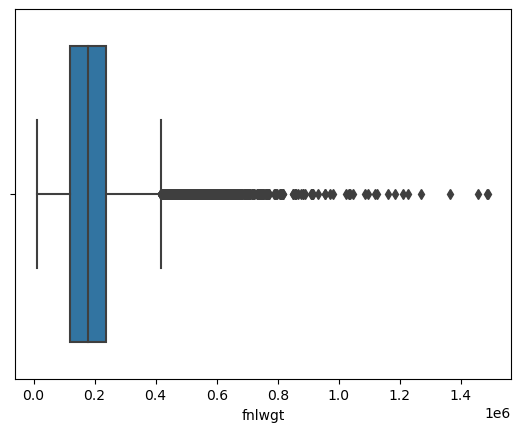

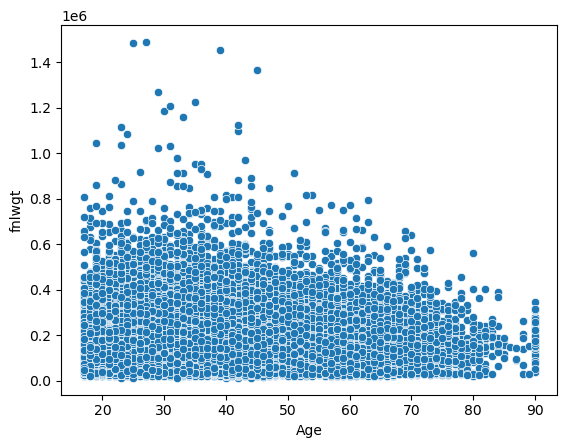

In [7]:

# Histogram of a specific column
sns.histplot(data['fnlwgt'])
plt.show()

# Box plot for another column
sns.boxplot(x=data['fnlwgt'])
plt.show()

# Scatter plot to explore relationship between two numerical variables
sns.scatterplot(x='Age', y='fnlwgt', data=data)
plt.show()


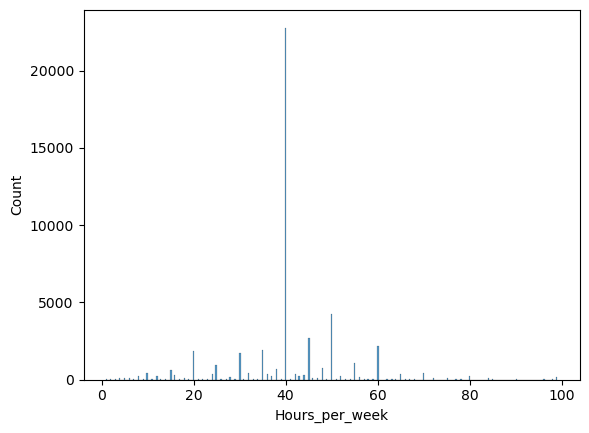

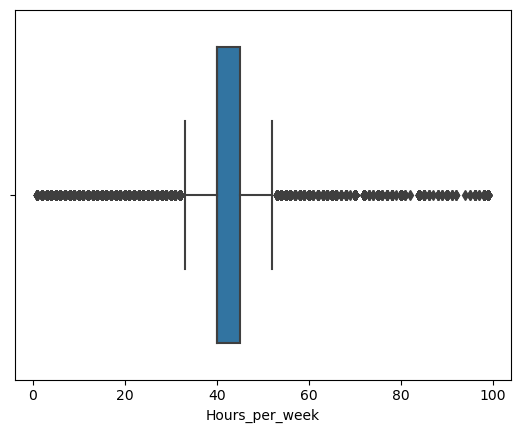

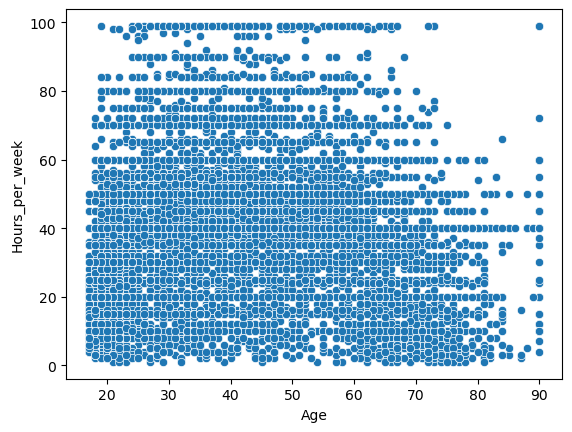

In [8]:
# Histogram of a specific column
sns.histplot(data['Hours_per_week'])
plt.show()

# Box plot for another column
sns.boxplot(x=data['Hours_per_week'])
plt.show()

# Scatter plot to explore relationship between two numerical variables
sns.scatterplot(x='Age', y='Hours_per_week', data=data)
plt.show()

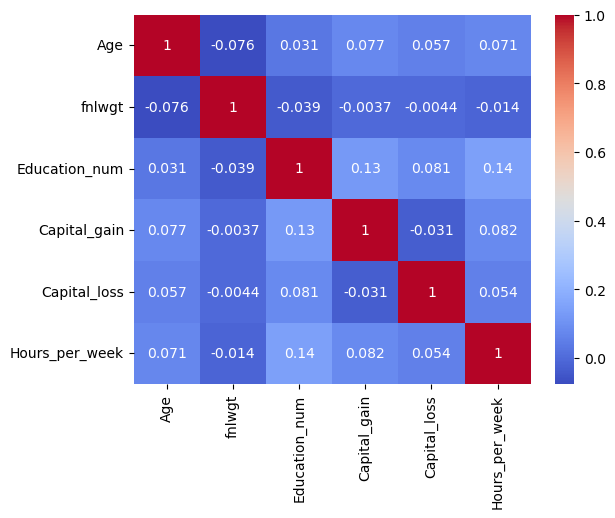

In [9]:
# Correlation matrix
correlation_matrix = data.corr()
# print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [10]:
# More detailed correlation analysis
strong_correlations = correlation_matrix[correlation_matrix.abs() > 0.8]
print(strong_correlations)


                Age  fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.0     NaN            NaN           NaN           NaN   
fnlwgt          NaN     1.0            NaN           NaN           NaN   
Education_num   NaN     NaN            1.0           NaN           NaN   
Capital_gain    NaN     NaN            NaN           1.0           NaN   
Capital_loss    NaN     NaN            NaN           NaN           1.0   
Hours_per_week  NaN     NaN            NaN           NaN           NaN   

                Hours_per_week  
Age                        NaN  
fnlwgt                     NaN  
Education_num              NaN  
Capital_gain               NaN  
Capital_loss               NaN  
Hours_per_week             1.0  


In [11]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(data.select_dtypes(include=[np.number]))
print(reduced_data.shape)


(48813, 5)


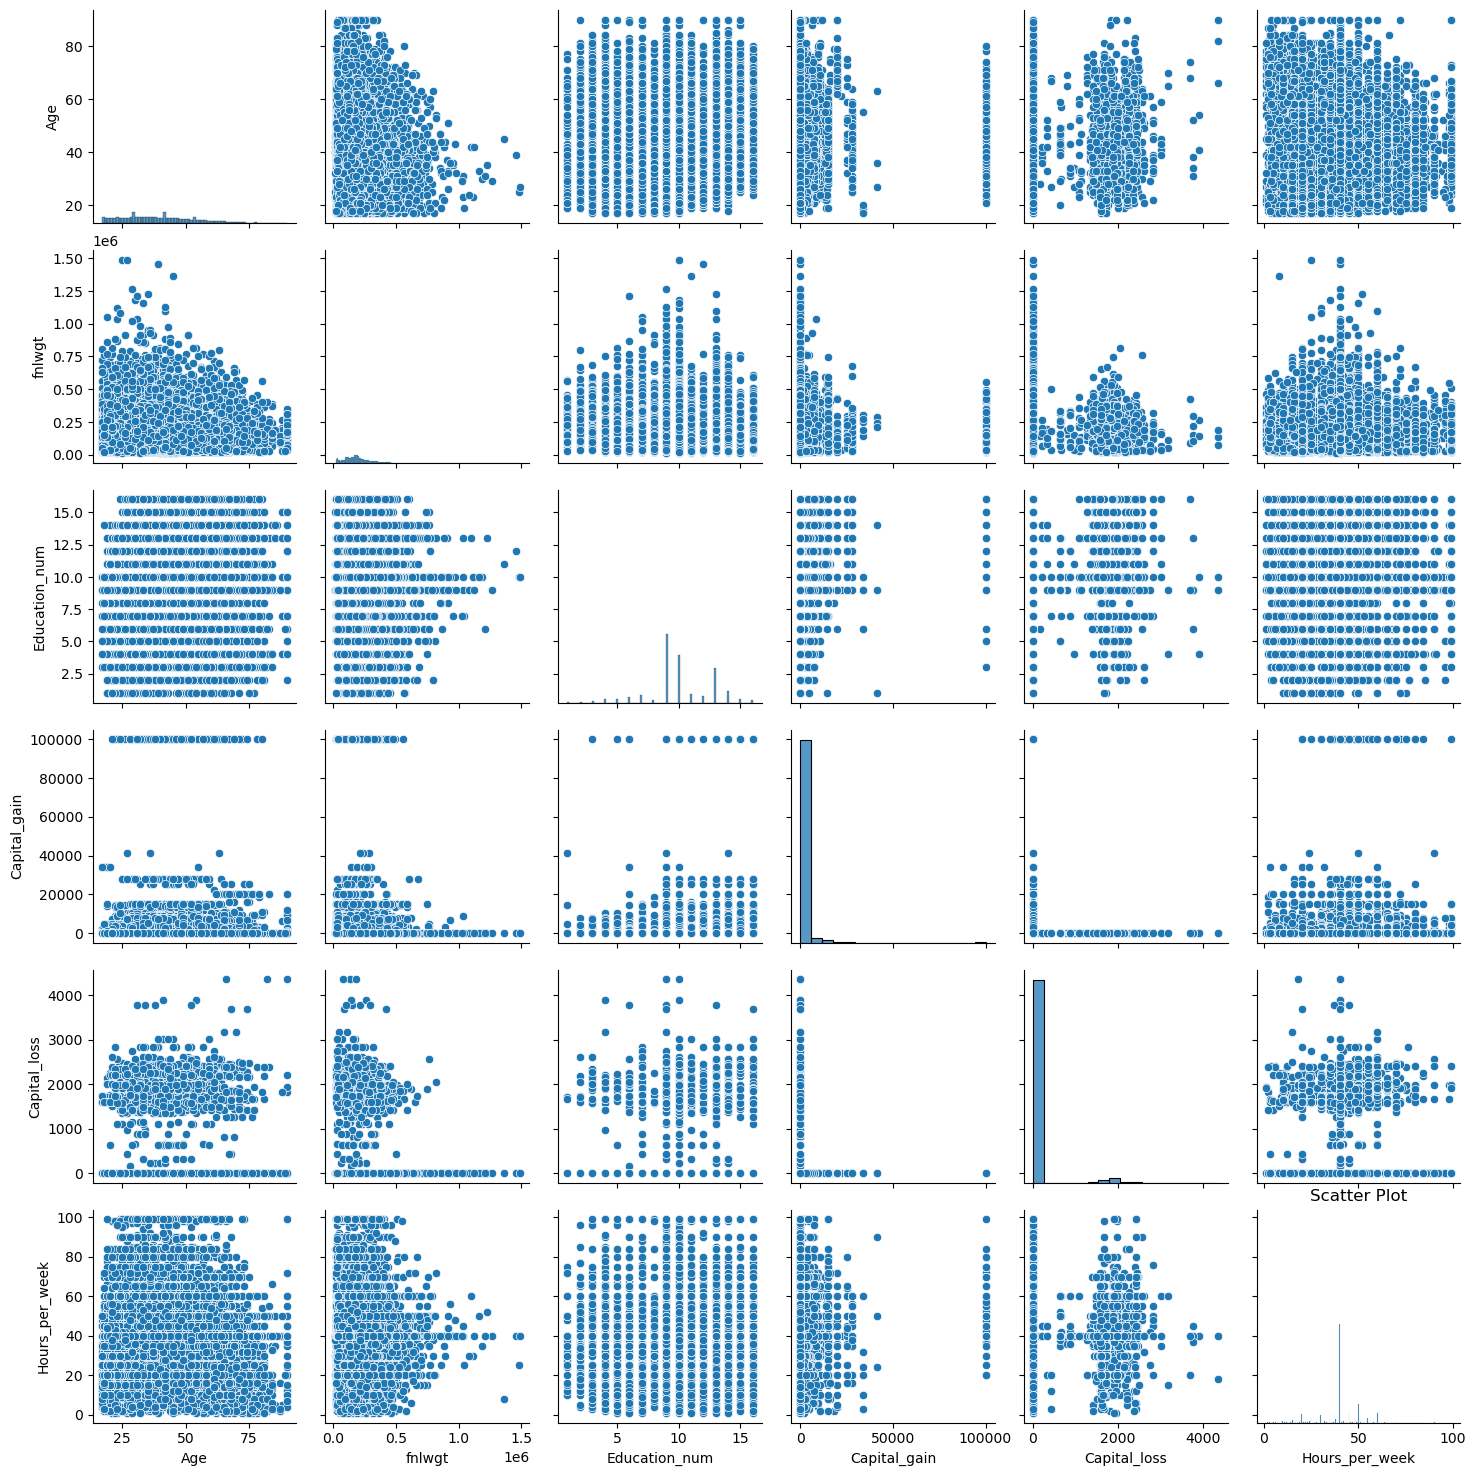

In [12]:
#Scatter plot
sns.pairplot(data, kind='scatter')
plt.title('Scatter Plot')
plt.show()